In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd
import seaborn as sns
sns.set_theme()
import statsmodels

In [2]:
from all_models import *

In [3]:
# read fit values
fits_single = pickle.load(open('fit_single_CV_704.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_CV_704.pickle', 'rb'))
#fits_eight = pickle.load(open('fit_dual_eight_CV_704.pickle', 'rb'))
#fits_six = pickle.load(open('fit_six_CV_704.pickle', 'rb'))
#fits_mixed = pickle.load(open('fit_mixed_CV_704.pickle', 'rb'))
#fits_single_transfer = pickle.load(open('fit_single_CV_transfer.pickle', 'rb'))
#fits_dual_transfer = pickle.load(open('fit_dual_CV_transfer.pickle', 'rb'))
fits_alpha = pickle.load(open('fit_dual_2alpha_CV_704.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90.0
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [24]:
all_A = np.zeros(60*100)
all_B = np.zeros(60*100)
all_Af = np.zeros(60*100)
all_Bf = np.zeros(60*100)
all_As = np.zeros(60*100)
all_Bs = np.zeros(60*100)
all_alphas = np.zeros(60*100)
for i in range(100):
    all_A[i*60:(i+1)*60] = fits_single[i][:, 0]
    all_B[i*60:(i+1)*60] = fits_single[i][:, 1]
    all_Af[i*60:(i+1)*60] = fits_alpha[i][:, 0]
    all_Bf[i*60:(i+1)*60] = fits_alpha[i][:, 1]
    all_As[i*60:(i+1)*60] = fits_alpha[i][:, 2]
    all_Bs[i*60:(i+1)*60] = fits_alpha[i][:, 3]
    all_alphas[i*60:(i+1)*60] = fits_alpha[i][:, 4]

In [25]:
parameters_df = pd.DataFrame({'Participant_Id': np.tile(range(60), 100),
                         'Rotation': np.tile(['Sudden', 'Sudden', 'Gradual', 'Gradual'], 15*100), 
                         'Emphasis': np.tile(['Speed', 'Accuracy'], 30*100),
                         'A': all_A,
                         'B': all_B,
                         'Af': all_Af,
                         'Bf': all_Bf,
                         'As': all_As,
                         'Bs': all_Bs,
                         'Alpha': all_alphas
                        })

In [26]:
parameters_means = parameters_df.groupby(['Participant_Id', 'Rotation', 'Emphasis']).mean().reset_index()


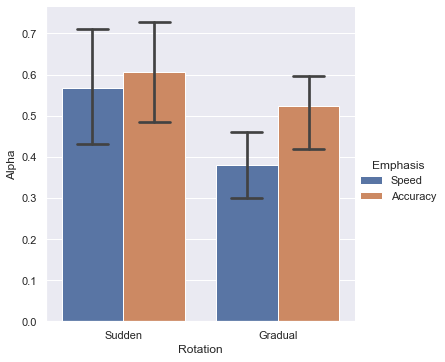

In [41]:
sns.catplot(x = 'Rotation', y = 'Alpha', hue = 'Emphasis', data = parameters_means, kind = 'bar', capsize = 0.2)

In [40]:
model = smf.ols('Alpha~Rotation*Emphasis', data = parameters_means).fit()
aov = sm.stats.anova_lm(model)
aov

,df,sum_sq,mean_sq,F,PR(>F)
Rotation,1.0,0.276293,0.276293,5.625886,0.021159
Emphasis,1.0,0.123731,0.123731,2.519416,0.118083
Rotation:Emphasis,1.0,0.042310,0.042310,0.861519,0.357297
Residual,56.0,2.750220,0.049111,NaN,NaN


In [94]:
alpha_medians = alpha_df.groupby(['Participant_Id', 'Rotation', 'Emphasis']).median().reset_index()
alpha_means = alpha_df.groupby(['Participant_Id', 'Rotation', 'Emphasis']).mean().reset_index()


Text(0.5, 0.8793567452082017, '*')

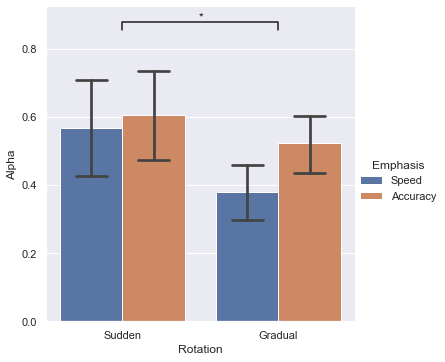

In [95]:
x1, x2 = 0, 1
y, h, col = alpha_means['Alpha'].max() - 0.2, 0.025, 'k'

sns.catplot(x = 'Rotation', y = 'Alpha', hue = 'Emphasis', data = alpha_means, kind = 'bar', capsize = 0.2)
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)


In [128]:
alpha_means['Errors'] = np.mean(curvatures_smooth[:, -1, :], axis = 1)

In [121]:
alpha_df['Errors'] = np.tile(np.mean(curvatures_smooth[:, -1, :] - curvatures_smooth[:, -2, :], axis = 1), 100)

Text(0.5, 1.0, 'AfterEffects')

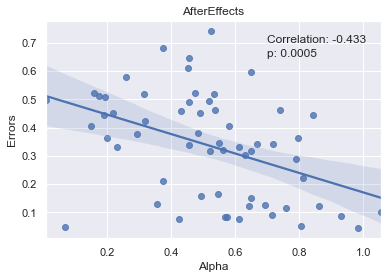

In [129]:
sns.regplot(y = 'Errors', x = 'Alpha', data = alpha_means)
plt.text(0.7, 0.7, 'Correlation: -0.433')
plt.text(0.7, 0.65, 'p: 0.0005')
plt.title('AfterEffects')

In [127]:
stat.pearsonr(alpha_means['Errors'], alpha_means['Alpha'])

(-0.2921734366052847, 0.023498364562436664)

,df,sum_sq,mean_sq,F,PR(>F)
Rotation,1.0,0.006013,0.006013,0.293354,0.590228
Emphasis,1.0,0.162850,0.162850,7.945432,0.006652
Rotation:Emphasis,1.0,0.005307,0.005307,0.258942,0.612847
Residual,56.0,1.147776,0.020496,NaN,NaN


In [78]:
A = np.mean(fits_single, axis = 0)[:, 0]
B = np.mean(fits_single, axis = 0)[:, 1]
Af = np.mean(fits_dual, axis = 0)[:, 0]
Bf = np.mean(fits_dual, axis = 0)[:, 1]
As = np.mean(fits_dual, axis = 0)[:, 2]
Bs = np.mean(fits_dual, axis = 0)[:, 3]

Af8 = np.mean(fits_eight, axis = 0)[:, 0]
Bf8 = np.mean(fits_eight, axis = 0)[:, 1]
As8 = np.mean(fits_eight, axis = 0)[:, 2]
Bs8 = np.mean(fits_eight, axis = 0)[:, 3]
Aft8 = np.mean(fits_eight, axis = 0)[:, 4]
Bft8 = np.mean(fits_eight, axis = 0)[:, 5]
Ast8 = np.mean(fits_eight, axis = 0)[:, 6]
Bst8 = np.mean(fits_eight, axis = 0)[:, 7]


NameError: name 'fits_eight' is not defined

In [4]:
d = {'Rotation': np.ravel(np.row_stack((np.repeat('Sudden', 30), np.repeat('Gradual', 30)))),
     'Emphasis': np.ravel(np.row_stack((np.repeat('Speed', 15), np.repeat('Accuracy', 15), np.repeat('Speed', 15), np.repeat('Accuracy', 15)))),
     'A': np.concatenate((A[0::4], A[1::4], A[2::4], A[3::4])),
     'B': np.concatenate((B[0::4], B[1::4], B[2::4], B[3::4])),
     'Af': np.concatenate((Af[0::4], Af[1::4], Af[2::4], Af[3::4])),
     'Bf': np.concatenate((Bf[0::4], Bf[1::4], Bf[2::4], Bf[3::4])),
     'As': np.concatenate((As[0::4], As[1::4], As[2::4], As[3::4])),
     'Bs': np.concatenate((Bs[0::4], Bs[1::4], Bs[2::4], Bs[3::4])),

     'Af8': np.concatenate((Af8[0::4], Af8[1::4], Af8[2::4], Af8[3::4])),
     'Bf8': np.concatenate((Bf8[0::4], Bf8[1::4], Bf8[2::4], Bf8[3::4])),
     'As8': np.concatenate((As8[0::4], As8[1::4], As8[2::4], As8[3::4])),
     'Bs8': np.concatenate((Bs8[0::4], Bs8[1::4], Bs8[2::4], Bs8[3::4])),
     'Aft8': np.concatenate((Aft8[0::4], Aft8[1::4], Aft8[2::4], Aft8[3::4])),
     'Bft8': np.concatenate((Bft8[0::4], Bft8[1::4], Bft8[2::4], Bft8[3::4])),
     'Ast8': np.concatenate((Ast8[0::4], Ast8[1::4], Ast8[2::4], Ast8[3::4])),
     'Bst8': np.concatenate((Bst8[0::4], Bst8[1::4], Bst8[2::4], Bst8[3::4])),
     
    }

In [37]:
parameters = pd.DataFrame(d)
melted = pd.melt(parameters, id_vars=['Rotation','Emphasis'], var_name='params', value_name='Mean_Parameter_Values')


In [7]:
parameters

,Rotation,Emphasis,A,B,Af,Bf,As,Bs,Af8,Bf8,As8,Bs8,Aft8,Bft8,Ast8,Bst8
0,Sudden,Speed,0.801657,0.00963723,0.16319,0.0196429,0.35996,0.0164206,0.0399945,0.0439608,0.290114,0.0434884,0.791586,0.522153,0.939142,0.0227065
1,Sudden,Speed,0.934634,0.0585091,0.554743,0.134738,0.96526,0.0186259,0.231155,0.219329,0.974686,0.016209,0.410656,0.229855,0.979519,0.0105564
2,Sudden,Speed,0.985546,0.0714154,0.469916,0.446098,0.997803,0.0138059,0.479851,0.471821,0.9979,0.0141793,0.52756,0.526701,0.937151,0.0125186
3,Sudden,Speed,0.789664,0.0193559,0.295801,0.0195781,0.650347,0.015075,0.410428,0.0169567,0.645527,0.0154904,0.498878,0.0275521,0.758169,0.00531913
4,Sudden,Speed,0.982309,0.00799946,0.353445,0.0274668,0.976532,0.0094189,0.278281,0.264587,0.375148,0.0173269,0.327909,0.492327,0.675855,0.0089241
5,Sudden,Speed,0.999077,0.00471333,0.468835,0.10618,0.971698,0.00610083,0.295497,0.0951815,0.999263,0.00445951,0.623293,0.295574,0.99021,0.0127153
6,Sudden,Speed,0.91655,0.0537895,0.370253,0.146049,0.943686,0.0205121,0.0931347,0.291374,0.952345,0.0145182,0.727025,0.17943,0.996307,0.00463755
7,Sudden,Speed,0.997929,0.00758385,0.299856,0.0619293,0.925273,0.0131368,0.366564,0.0904643,0.953163,0.0129781,0.275131,0.335819,0.682394,0.0383065
8,Sudden,Speed,0.991947,0.00823423,0.53617,0.148662,0.972599,0.00383905,0.25927,0.25952,0.985288,0.00529057,0.388726,0.230004,0.973105,0.0119546
9,Sudden,Speed,1,0.00472191,0.490128,0.094293,0.970175,0.00991875,0.145741,0.130729,0.983447,0.0164552,0.315779,0.386598,0.550723,0.0369626


(0.0, 1.0)

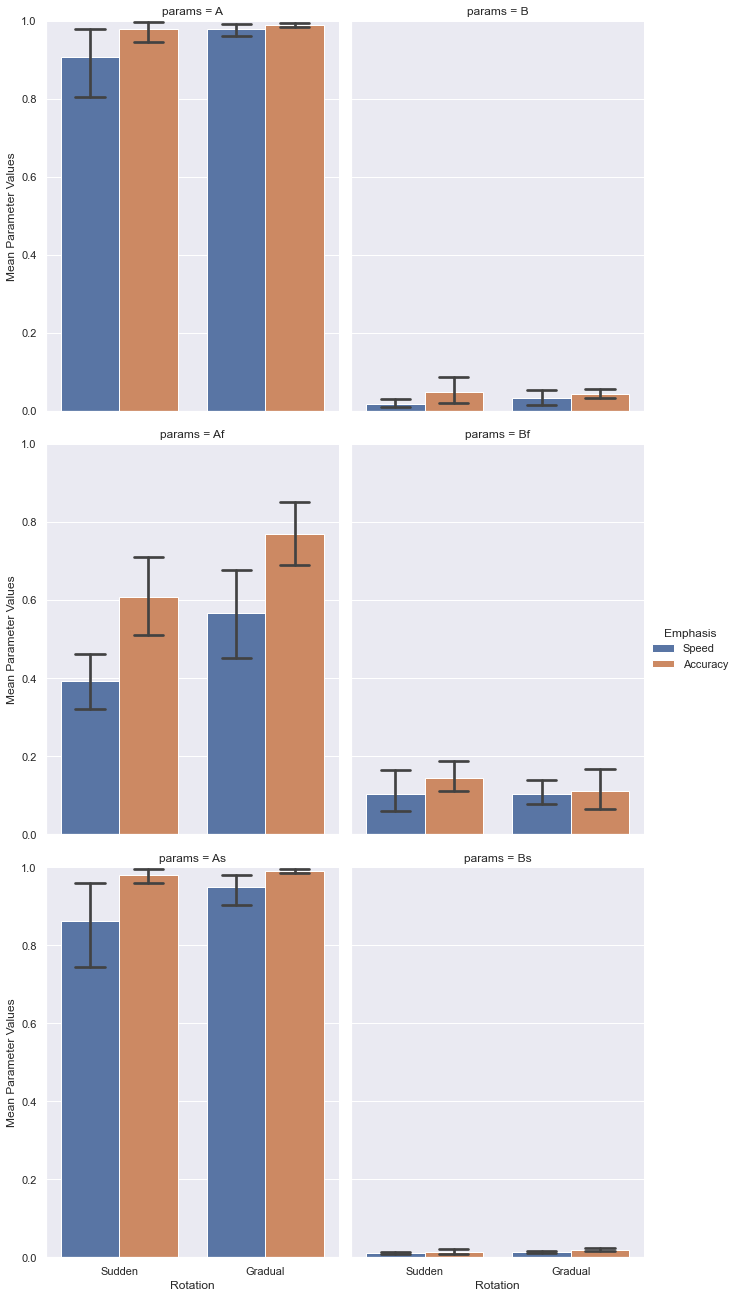

In [27]:
g = sns.catplot(x="Rotation", y="Mean_Parameter_Values", hue="Emphasis", col = 'params',
                col_wrap=2, col_order = ['A', 'B', 
                                         'Af', 'Bf', 
                                        'As', 'Bs',],
                capsize=.2, height=6, aspect=.75,ci = 95,
                kind = 'bar', data=melted)

plt.ylim((0, 1))


(0.0, 1.0)

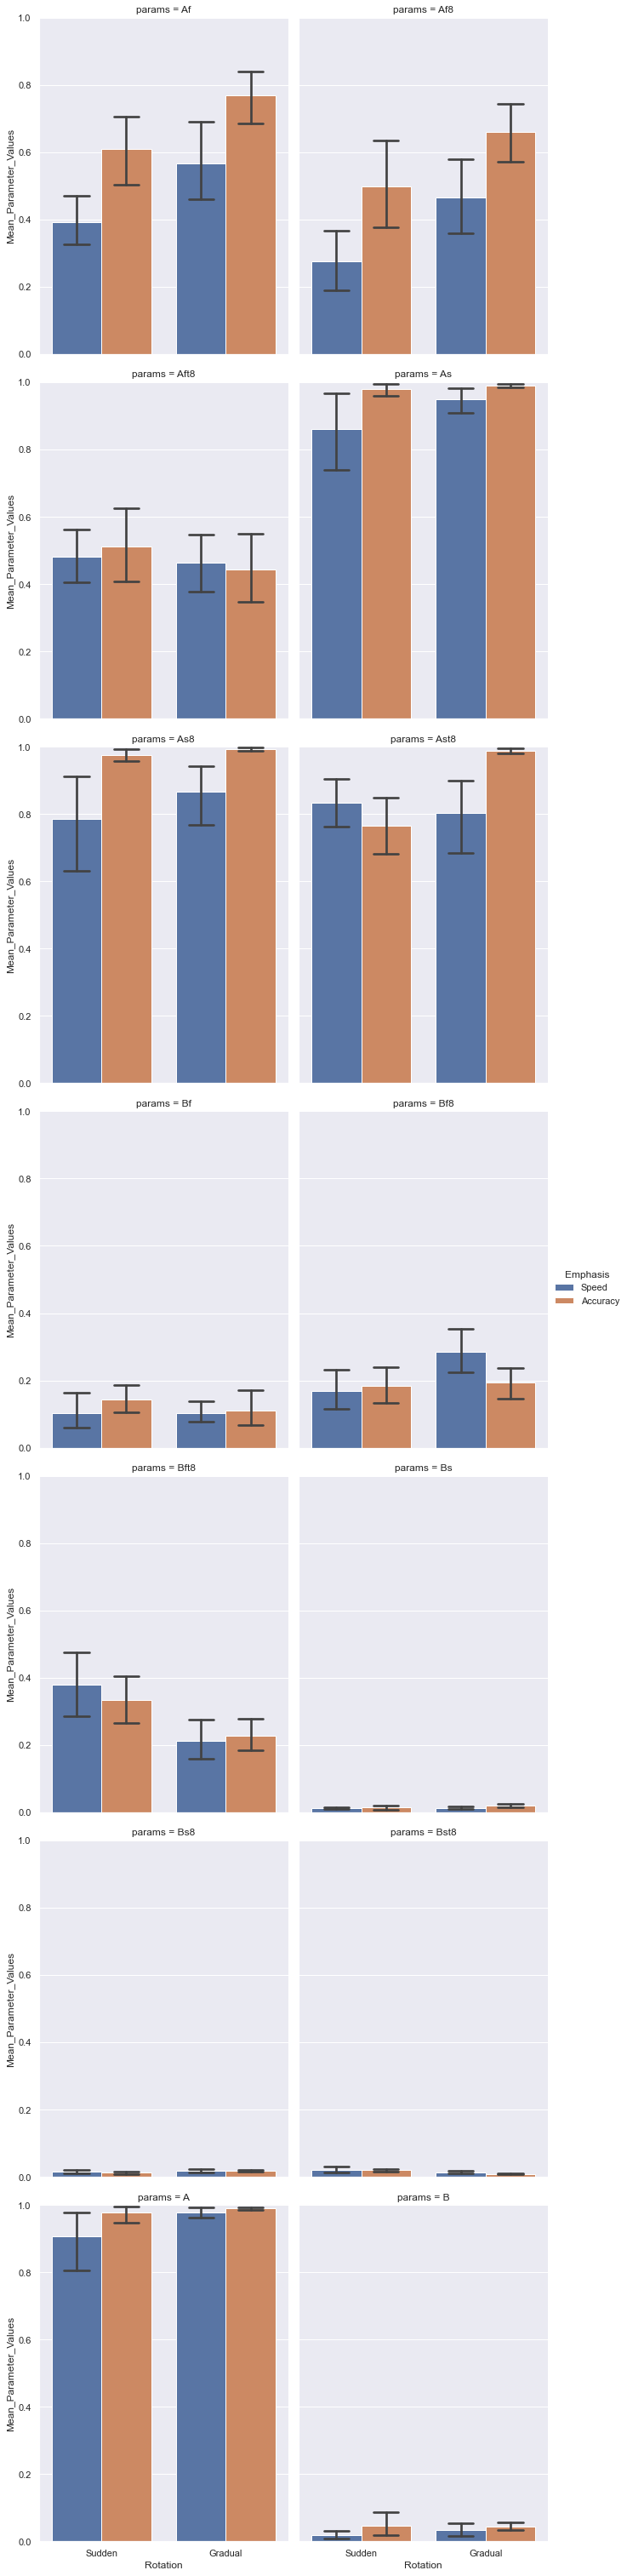

In [38]:
g = sns.catplot(x="Rotation", y="Mean_Parameter_Values", hue="Emphasis", col = 'params',
                col_wrap=2, col_order = ['Af', 'Af8', 'Aft8', 
                                         'As', 'As8', 'Ast8', 
                                         'Bf', 'Bf8', 'Bft8',
                                         'Bs', 'Bs8', 'Bst8',
                                        'A', 'B'],
                capsize=.2, height=6, aspect=.75,ci = 95,
                kind = 'bar', data=melted)

plt.ylim((0, 1))

In [39]:
parameters['A'] = parameters['A'].astype(float)
model = smf.ols('A~C(Rotation)*C(Emphasis)', data=parameters).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Rotation),0.025383,1.0,2.570068,0.114529
C(Emphasis),0.024312,1.0,2.461549,0.122297
C(Rotation):C(Emphasis),0.013339,1.0,1.350597,0.250103
Residual,0.553086,56.0,NaN,NaN


0     0.801657
1     0.934634
2     0.985546
3     0.789664
4     0.982309
5     0.999077
6     0.916550
7     0.997929
8     0.991947
9     1.000000
10    0.276626
11    0.960270
12    0.999998
13    0.998239
14    0.979953
15    0.997921
16    0.990912
17    0.999806
18    0.999113
19    0.992074
20    0.776307
21    0.997878
22    0.998559
23    0.995355
24    0.996860
25    0.964350
26    0.980000
27    0.998788
28    0.979658
29    0.998012
30    0.999992
31    0.973574
32    0.949183
33    0.946405
34    0.997467
35    1.000000
36    0.999934
37    0.966759
38    0.967983
39    0.996174
40    1.000000
41    0.886317
42    0.998335
43    1.000000
44    0.996639
45    0.994828
46    0.996258
47    0.991635
48    0.992759
49    0.990497
50    0.970021
51    0.985764
52    0.991143
53    0.985224
54    0.985411
55    0.997342
56    0.994426
57    0.999271
58    0.967612
59    0.993138
Name: A, dtype: float64